In [43]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/eshentong/BA780-team10-project/main/readmission.csv')

In [44]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [5]:
#checking unique values against length of data
df['admission_type_id'].nunique(), df['encounter_id'].shape

(8, (101766,))

In [45]:
#subsetting the columns that I'm in charge of
columns_to_subset=['glyburide-metformin', #anti-diabetic medicine for type2 diabetes
                      'glipizide-metformin', #another type of drug for treating type2 diabetes
                     'glimepiride-pioglitazone', #anti-diabetic medicine, sometimes used with glipizide
                      'metformin-rosiglitazone', #anti-diabetic med, used together with a proper diet and exercise to help control blood sugar levels.
                    'metformin-pioglitazone', #Pioglitazone works by helping your body use insulin better. Metformin reduces the absorption of sugar from the stomach
                    'change', #change between types of diabetes?
                    'diabetesMed',
                    'readmitted']

my_portion=df[columns_to_subset]

In [48]:
#checking null and na values
my_portion.isnull().sum(), my_portion.isna().sum()

(glyburide-metformin         0
 glipizide-metformin         0
 glimepiride-pioglitazone    0
 metformin-rosiglitazone     0
 metformin-pioglitazone      0
 change                      0
 diabetesMed                 0
 readmitted                  0
 dtype: int64,
 glyburide-metformin         0
 glipizide-metformin         0
 glimepiride-pioglitazone    0
 metformin-rosiglitazone     0
 metformin-pioglitazone      0
 change                      0
 diabetesMed                 0
 readmitted                  0
 dtype: int64)

In [49]:
#identifying data types
my_portion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   glyburide-metformin       101766 non-null  object
 1   glipizide-metformin       101766 non-null  object
 2   glimepiride-pioglitazone  101766 non-null  object
 3   metformin-rosiglitazone   101766 non-null  object
 4   metformin-pioglitazone    101766 non-null  object
 5   change                    101766 non-null  object
 6   diabetesMed               101766 non-null  object
 7   readmitted                101766 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [50]:
#updating the column data types
my_portion = my_portion.astype('category')

In [58]:
#to investigate the different categories within each column:
my_portion['glyburide-metformin'].unique(), my_portion['glipizide-metformin'].unique(), my_portion['glimepiride-pioglitazone'].unique(), my_portion['metformin-rosiglitazone'].unique(), \
my_portion['metformin-pioglitazone'].unique(), my_portion['change'].unique(), my_portion['diabetesMed'].unique(), my_portion['readmitted'].unique()

([0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [1, 0],
 [0, 1]
 Categories (2, int64): [0, 1],
 ['NO', 1]
 Categories (2, object): [1, 'NO'])

In [64]:
#for any columns that saw more than 2 categories, transform them to 0s and 1s:
my_portion['glyburide-metformin'] = my_portion['glyburide-metformin'].replace(['Up', 'Down'], 'Steady')

my_portion['readmitted']= my_portion['readmitted'].replace('>30', 'NO')

In [69]:
for i in my_portion.columns:
  my_portion[i]= my_portion[i].replace({ 'No': 0, 'NO': 0, 'Steady': 1, 'Ch': 1, 'Yes': 1, '<30' :1})

In [70]:
#running this again to check the replace was successful
my_portion['glyburide-metformin'].unique(), my_portion['glipizide-metformin'].unique(), my_portion['glimepiride-pioglitazone'].unique(), my_portion['metformin-rosiglitazone'].unique(), \
my_portion['metformin-pioglitazone'].unique(), my_portion['change'].unique(), my_portion['diabetesMed'].unique(), my_portion['readmitted'].unique()

([0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [1, 0],
 [0, 1]
 Categories (2, int64): [0, 1],
 [0, 1]
 Categories (2, int64): [1, 0])

In [81]:
my_portion = my_portion.astype(int)

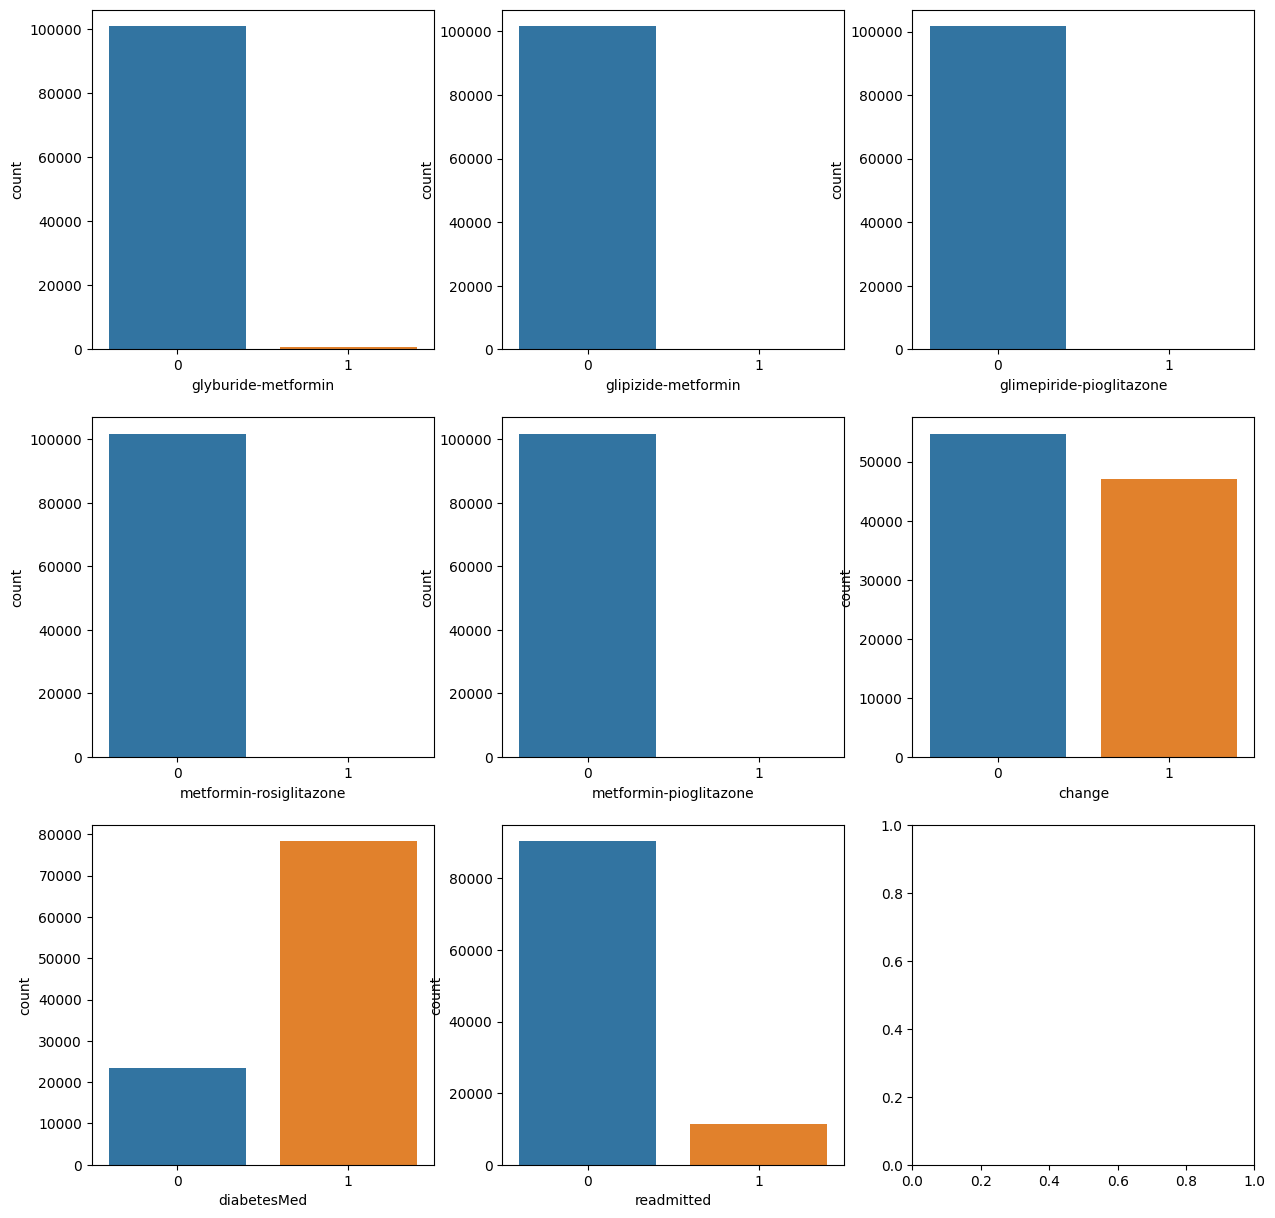

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

a=0
b=0

for i in my_portion.columns:
  ax=axes[a,b]
  sns.countplot(data=my_portion, x=i, ax=ax, order=[0, 1])

  if b>=2:
    b=0
    a+=1
  else:
    b+=1

plt.show()

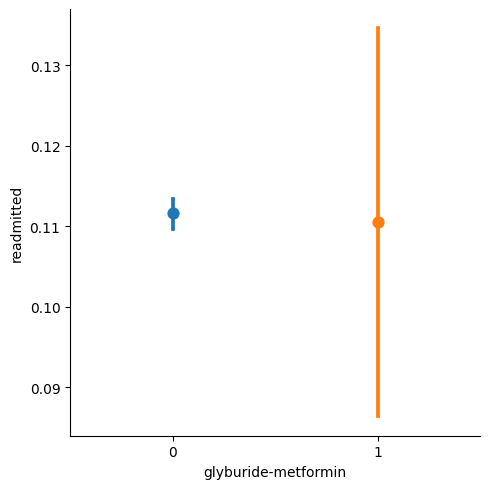

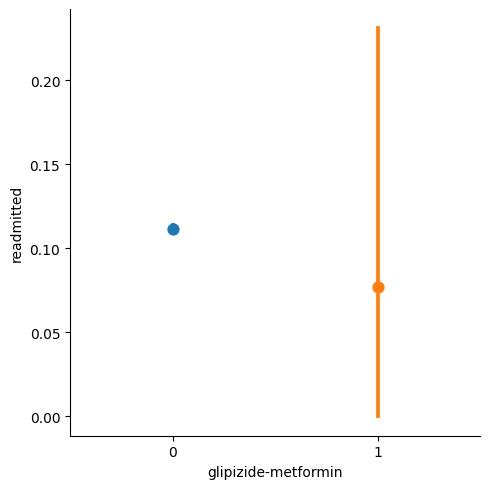

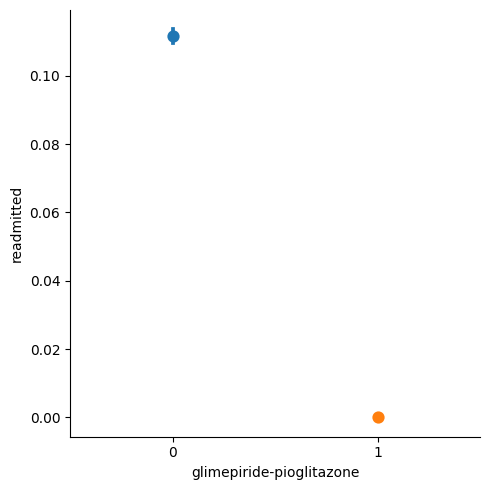

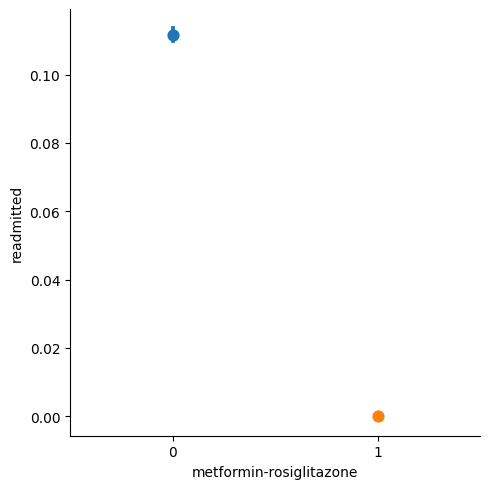

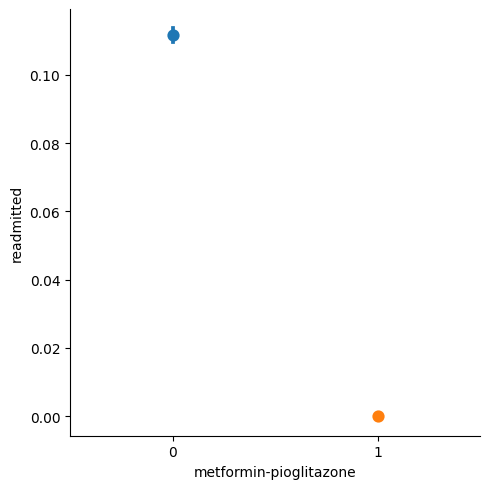

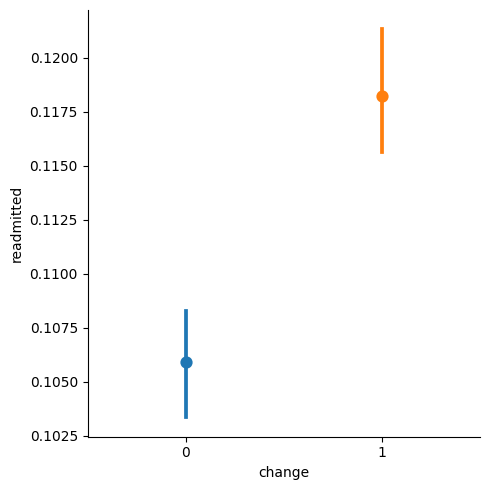

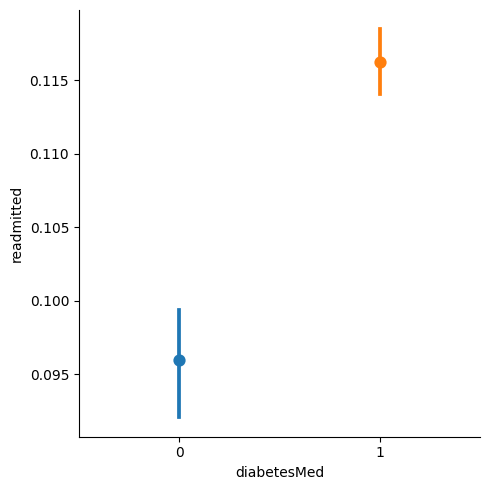

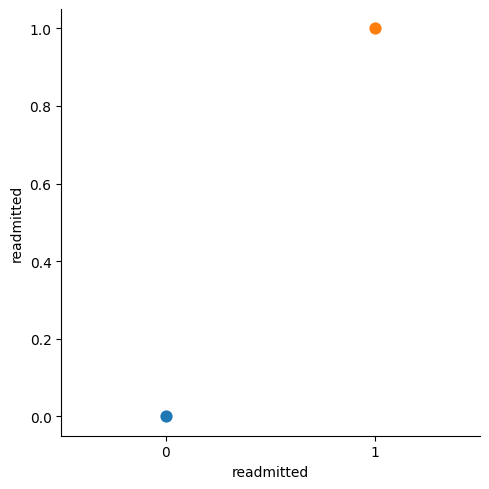

In [92]:
for i in my_portion.columns:
    sns.catplot(kind='point', data=my_portion, x=i, y='readmitted', order=[0, 1], hue=i)
plt.show()
